In [75]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [76]:

X,y = make_classification(n_samples=1000, n_features=3, n_informative=3, 
                    n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1,
                          class_sep=1.5,
                   flip_y=0,weights=[0.5,0.65])

X = pd.DataFrame(X)
y = pd.Series(y)

cols =['feature'+str(i) for i in range(0,3)]
X.columns =  cols
y.columns = ['target']

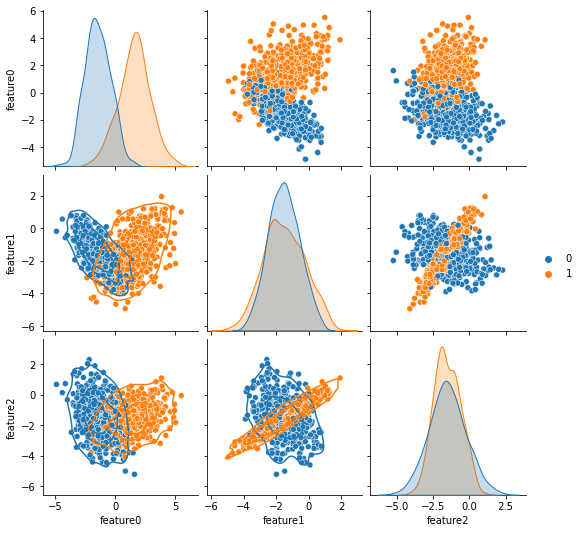

In [60]:
g = sns.pairplot(pd.concat([X,y],axis=1), diag_kind="kde",hue=0)
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.map_upper(sns.scatterplot)
plt.show()

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.250174
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  670
Model:                          Logit   Df Residuals:                      667
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Feb 2022   Pseudo R-squ.:                  0.6384
Time:                        18:14:03   Log-Likelihood:                -167.62
converged:                       True   LL-Null:                       -463.55
Covariance Type:            nonrobust   LLR p-value:                3.018e-129
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
feature0       1.9981      0.155     12.932      0.000       1.695       2.301
feature1      -0.0021      0.

In [81]:
y_pred = log_reg.predict(X_train)
y_pred = list(map(round, y_pred))

In [82]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       352
           1       0.91      0.88      0.89       318

    accuracy                           0.90       670
   macro avg       0.90      0.90      0.90       670
weighted avg       0.90      0.90      0.90       670



In [83]:
y_pred = log_reg.predict(X_test)
y_pred = list(map(round, y_pred))

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       148
           1       0.93      0.84      0.88       182

    accuracy                           0.87       330
   macro avg       0.87      0.88      0.87       330
weighted avg       0.88      0.87      0.87       330

